In [295]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import geopandas as gpd
from shapely.geometry import Point
import plotly.express as px 
import re
import datetime 

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500) 

color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]



## DATA ANALYSİS

In [296]:
data = pd.read_csv("veriler.csv", parse_dates=["Olus tarihi"]) 

data["Olus tarihi"] = pd.to_datetime(data["Olus tarihi"]) 

data = data.set_index("Olus tarihi")  

data.index.name = None  
data.head(25)


,No,Deprem Kodu,Olus zamani,Enlem,Boylam,Der(km),xM,MD,ML,Mw,Ms,Mb,Tip,Yer
2023-07-31,1,20230731215338,21:53:38.29,37.415,37.170,4.000,3.500,0.000,3.500,3.400,0.000,0.000,Ke,DOGANLI-PAZARCIK (KAHRAMANMARAS) [East 1.3 km]
2023-07-31,2,20230731152316,15:23:16.85,38.141,38.434,5.200,3.500,0.000,3.500,3.400,0.000,0.000,Ke,AKSU-SINCIK (ADIYAMAN) [West 6.4 km]
2023-07-31,3,20230731025049,02:50:49.84,37.835,26.835,6.200,3.000,0.000,3.000,0.000,0.000,0.000,Ke,SISAM ADASI (EGE DENIZI)
2023-07-30,4,20230730201940,20:19:40.49,40.809,31.018,5.300,3.100,0.000,3.100,3.100,0.000,0.000,Ke,ICMELER-GOLYAKA (DUZCE) [South East 0.7 km]
2023-07-30,5,20230730161352,16:13:52.62,38.129,38.186,2.400,3.000,0.000,3.000,0.000,0.000,0.000,Ke,CAMPINAR-CELIKHAN (ADIYAMAN) [North West 4.3 km]
2023-07-30,6,20230730151316,15:13:16.85,36.273,35.872,4.400,3.700,0.000,3.600,3.700,0.000,0.000,Ke,KALE-ARSUZ (HATAY) [South East 7.4 km]
2023-07-30,7,20230730135451,13:54:51.96,40.572,30.730,2.100,3.000,0.000,3.000,2.900,0.000,0.000,Ke,KAYABASI-AKYAZI (SAKARYA) [North East 0.6 km]
2023-07-29,8,20230729212103,21:21:03.22,37.983,36.268,5.200,3.000,0.000,3.000,3.000,0.000,0.000,Ke,KAZANDERE-GOKSUN (KAHRAMANMARAS) [North West ...
2023-07-29,9,20230729211549,21:15:49.12,37.639,34.742,5.600,3.000,0.000,3.000,2.900,0.000,0.000,Ke,BASMAKCI-ULUKISLA (NIGDE) [South East 2.9 km]
2023-07-29,10,20230729185334,18:53:34.40,37.589,35.917,5.000,3.000,0.000,3.000,0.000,0.000,0.000,Ke,MINNETLI-KOZAN (ADANA) [South West 3.1 km]


In [297]:
def check_data(dataframe,head=5):
    print(20*"-" + "Information".center(20) + 20*"-")
    print(dataframe.info())
    print(20*"-" + "Data Shape".center(20) + 20*"-")
    print(dataframe.shape)
    print("\n" + 20*"-" + "The First 5 Data".center(20) + 20*"-")
    print(dataframe.head())
    print("\n" + 20 * "-" + "The Last 5 Data".center(20) + 20 * "-")
    print(dataframe.tail())
    print("\n" + 20 * "-" + "Missing Values".center(20) + 20 * "-")
    print(dataframe.isnull().sum())
    print("\n" + 40 * "-" + "Describe the Data".center(40) + 40 * "-")
    print(dataframe.describe([0.01, 0.05, 0.10, 0.50, 0.75, 0.90, 0.95, 0.99]).T)

check_data(data)

--------------------    Information     --------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50000 entries, 2023-07-31 to 1994-09-11
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   No           50000 non-null  int64  
 1   Deprem Kodu  50000 non-null  int64  
 2   Olus zamani  50000 non-null  object 
 3   Enlem        50000 non-null  float64
 4   Boylam       50000 non-null  float64
 5   Der(km)      50000 non-null  float64
 6   xM           50000 non-null  float64
 7   MD           50000 non-null  float64
 8   ML           50000 non-null  float64
 9   Mw           12922 non-null  float64
 10  Ms           50000 non-null  float64
 11  Mb           50000 non-null  float64
 12  Tip          50000 non-null  object 
 13  Yer          50000 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 5.7+ MB
None
--------------------     Data Shape     --------------------
(50000, 14)



In [298]:
data.nunique()

No             50000
Deprem Kodu    50000
Olus zamani    49746
Enlem          20622
Boylam         28384
Der(km)          921
xM                42
MD                37
ML                45
Mw                46
Ms                12
Mb                24
Tip                2
Yer            33489
dtype: int64

In [299]:
data.isnull().sum()

No                 0
Deprem Kodu        0
Olus zamani        0
Enlem              0
Boylam             0
Der(km)            0
xM                 0
MD                 0
ML                 0
Mw             37078
Ms                 0
Mb                 0
Tip                0
Yer                0
dtype: int64

In [300]:
data.fillna(0, inplace=True)

In [301]:
## ENLEM VE BOYLAM SÜTUNLARINDAN coğrafi koordinatları oluşturur ve bu koordinatları GeoPandas GeoDataFrame olarak dönüştürdük.

data['Koordinatlar'] = data['Enlem'].astype(str) + ', ' + data['Boylam'].astype(str)


geometry = data['Koordinatlar'].apply(lambda x: Point([float(coord) for coord in x.split(',')]))


gdf = gpd.GeoDataFrame(data, geometry=geometry)

gdf.drop(columns=['Enlem'], inplace=True) # artık gerekli olmayan sütünları drop ettik.
gdf.drop(columns=['Boylam'], inplace=True)
gdf.drop(columns=['Deprem Kodu'], inplace=True)
gdf.drop(columns=['Olus zamani'], inplace=True)




In [302]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
DatetimeIndex: 50000 entries, 2023-07-31 to 1994-09-11
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   No            50000 non-null  int64   
 1   Der(km)       50000 non-null  float64 
 2   xM            50000 non-null  float64 
 3   MD            50000 non-null  float64 
 4   ML            50000 non-null  float64 
 5   Mw            50000 non-null  float64 
 6   Ms            50000 non-null  float64 
 7   Mb            50000 non-null  float64 
 8   Tip           50000 non-null  object  
 9   Yer           50000 non-null  object  
 10  Koordinatlar  50000 non-null  object  
 11  geometry      50000 non-null  geometry
dtypes: float64(7), geometry(1), int64(1), object(3)
memory usage: 5.0+ MB


In [303]:
gdf.head(25)

,No,Der(km),xM,MD,ML,Mw,Ms,Mb,Tip,Yer,Koordinatlar,geometry
2023-07-31,1,4.000,3.500,0.000,3.500,3.400,0.000,0.000,Ke,DOGANLI-PAZARCIK (KAHRAMANMARAS) [East 1.3 km],"37.4153, 37.1703",POINT (37.41530 37.17030)
2023-07-31,2,5.200,3.500,0.000,3.500,3.400,0.000,0.000,Ke,AKSU-SINCIK (ADIYAMAN) [West 6.4 km],"38.1413, 38.434",POINT (38.14130 38.43400)
2023-07-31,3,6.200,3.000,0.000,3.000,0.000,0.000,0.000,Ke,SISAM ADASI (EGE DENIZI),"37.8352, 26.8353",POINT (37.83520 26.83530)
2023-07-30,4,5.300,3.100,0.000,3.100,3.100,0.000,0.000,Ke,ICMELER-GOLYAKA (DUZCE) [South East 0.7 km],"40.8085, 31.0183",POINT (40.80850 31.01830)
2023-07-30,5,2.400,3.000,0.000,3.000,0.000,0.000,0.000,Ke,CAMPINAR-CELIKHAN (ADIYAMAN) [North West 4.3 km],"38.129, 38.1863",POINT (38.12900 38.18630)
2023-07-30,6,4.400,3.700,0.000,3.600,3.700,0.000,0.000,Ke,KALE-ARSUZ (HATAY) [South East 7.4 km],"36.2735, 35.8717",POINT (36.27350 35.87170)
2023-07-30,7,2.100,3.000,0.000,3.000,2.900,0.000,0.000,Ke,KAYABASI-AKYAZI (SAKARYA) [North East 0.6 km],"40.5722, 30.7302",POINT (40.57220 30.73020)
2023-07-29,8,5.200,3.000,0.000,3.000,3.000,0.000,0.000,Ke,KAZANDERE-GOKSUN (KAHRAMANMARAS) [North West ...,"37.9832, 36.2683",POINT (37.98320 36.26830)
2023-07-29,9,5.600,3.000,0.000,3.000,2.900,0.000,0.000,Ke,BASMAKCI-ULUKISLA (NIGDE) [South East 2.9 km],"37.6385, 34.7417",POINT (37.63850 34.74170)
2023-07-29,10,5.000,3.000,0.000,3.000,0.000,0.000,0.000,Ke,MINNETLI-KOZAN (ADANA) [South West 3.1 km],"37.5888, 35.917",POINT (37.58880 35.91700)


In [304]:
# yer sütünunda sadece parentez içinde olan ilçe ismini kullanmamı yeterli. 
# Parantez içindeki ifadeyi almak için bir regex deseni kullandık.
pattern = r"\((.*?)\)"


gdf['Yer'] = gdf['Yer'].apply(lambda x: re.search(pattern, x).group(1) if re.search(pattern, x) else x)


In [305]:
gdf.head(25)

,No,Der(km),xM,MD,ML,Mw,Ms,Mb,Tip,Yer,Koordinatlar,geometry
2023-07-31,1,4.000,3.500,0.000,3.500,3.400,0.000,0.000,Ke,KAHRAMANMARAS,"37.4153, 37.1703",POINT (37.41530 37.17030)
2023-07-31,2,5.200,3.500,0.000,3.500,3.400,0.000,0.000,Ke,ADIYAMAN,"38.1413, 38.434",POINT (38.14130 38.43400)
2023-07-31,3,6.200,3.000,0.000,3.000,0.000,0.000,0.000,Ke,EGE DENIZI,"37.8352, 26.8353",POINT (37.83520 26.83530)
2023-07-30,4,5.300,3.100,0.000,3.100,3.100,0.000,0.000,Ke,DUZCE,"40.8085, 31.0183",POINT (40.80850 31.01830)
2023-07-30,5,2.400,3.000,0.000,3.000,0.000,0.000,0.000,Ke,ADIYAMAN,"38.129, 38.1863",POINT (38.12900 38.18630)
2023-07-30,6,4.400,3.700,0.000,3.600,3.700,0.000,0.000,Ke,HATAY,"36.2735, 35.8717",POINT (36.27350 35.87170)
2023-07-30,7,2.100,3.000,0.000,3.000,2.900,0.000,0.000,Ke,SAKARYA,"40.5722, 30.7302",POINT (40.57220 30.73020)
2023-07-29,8,5.200,3.000,0.000,3.000,3.000,0.000,0.000,Ke,KAHRAMANMARAS,"37.9832, 36.2683",POINT (37.98320 36.26830)
2023-07-29,9,5.600,3.000,0.000,3.000,2.900,0.000,0.000,Ke,NIGDE,"37.6385, 34.7417",POINT (37.63850 34.74170)
2023-07-29,10,5.000,3.000,0.000,3.000,0.000,0.000,0.000,Ke,ADANA,"37.5888, 35.917",POINT (37.58880 35.91700)


In [306]:
# deprem ve türkiyenin bölgeleri analizi için bölgeler dictionarysi oluşturduk.

bolge_dict = {
    'Marmara': ['ISTANBUL', 'KOCAELI', 'BURSA', 'BALIKESIR', 'CANAKKALE', 'EDIRNE', 'KIRKLARELI', 'TEKIRDAG', 'YALOVA',"MARMARA DENIZI","SAKARYA"],
    'Ege': ['IZMIR', 'AYDIN', 'MANISA', 'MUGLA', 'AFYONKARAHISAR', 'DENIZLI', 'USAK', 'KUTAHYA',"EGE DENIZI"],
    'Akdeniz': ['ANTALYA', 'MERSIN', 'ADANA', 'HATAY', 'ISPARTA', 'BURDUR', 'OSMANIYE', 'KAHRAMANMARAS', 'MERSIN',"AKDENIZ"],
    'Karadeniz': ['TRABZON', 'SAMSUN', 'ORDU', 'RIZE', 'GIRESUN', 'SINOP', 'AMASYA', 'TOKAT', 'BARTIN', 'KASTAMONU', 'ZONGULDAK', 'DUZCE',"CORUM","ARTVIN","BAYBURT","GUMUSHANE","KARADENIZ"],
    'Ic Anadolu': ['ANKARA', 'KONYA', 'AKSARAY', 'NEVSEHIR', 'KAYSERI', 'KIRSEHIR', 'YOZGAT', 'KARAMAN', 'SIVAS', 'KIRIKKALE',"NIGDE","CANKIRI"],
    'Guneydogu Anadolu': ['DIYARBAKIR', 'SANLIURFA', 'ADIYAMAN', 'BATMAN', 'MARDIN', 'SIIRT', 'SIRNAK', 'KILIS', 'GAZIANTEP', 'HAKKARI'],
    'Dogu Anadolu': ['VAN', 'AGRI', 'IGDIR', 'KARS', 'ERZURUM', 'ERZINCAN', 'BINGOL', 'TUNCELI', 'MUS', 'BITLIS', 'ARDAHAN', 'MALATYA', 'ELAZIG']
}



gdf['Bolge'] = gdf['Yer'].apply(lambda il: next((bolge for bolge, iller in bolge_dict.items() if il in iller), None))


In [307]:
def ilin_bolgesini_bul(il_adi):
    for bolge, iller in bolge_dict.items():
        if il_adi in iller:
            return bolge
    return 'Bilinmeyen'  # Eğer il listede yoksa 'bilinmeyen' demek bu veride türkiye sınır ve ve türkiye bölgesi olmayan yerler demek.

gdf['Bolge'] = gdf['Yer'].apply(lambda x: ilin_bolgesini_bul(x.split('-')[-1].strip()))


In [308]:
data_bolge = gdf.groupby('Bolge')

In [309]:
for name, group in data_bolge:
    print(f'Bölge Adı: {name}, Boyutlar: {group.shape}')

Bölge Adı: Akdeniz, Boyutlar: (12454, 13)
Bölge Adı: Bilinmeyen, Boyutlar: (5006, 13)
Bölge Adı: Dogu Anadolu, Boyutlar: (9655, 13)
Bölge Adı: Ege, Boyutlar: (12887, 13)
Bölge Adı: Guneydogu Anadolu, Boyutlar: (1923, 13)
Bölge Adı: Ic Anadolu, Boyutlar: (2838, 13)
Bölge Adı: Karadeniz, Boyutlar: (1778, 13)
Bölge Adı: Marmara, Boyutlar: (3459, 13)


In [336]:
data_bolge.head()

,No,Der(km),xM,MD,ML,Mw,Ms,Mb,Tip,Yer,Koordinatlar,geometry,Bolge
2023-07-31,1,4.000,3.500,0.000,3.500,3.400,0.000,0.000,Ke,KAHRAMANMARAS,"37.4153, 37.1703",POINT (37.41530 37.17030),Akdeniz
2023-07-31,2,5.200,3.500,0.000,3.500,3.400,0.000,0.000,Ke,ADIYAMAN,"38.1413, 38.434",POINT (38.14130 38.43400),Guneydogu Anadolu
2023-07-31,3,6.200,3.000,0.000,3.000,0.000,0.000,0.000,Ke,EGE DENIZI,"37.8352, 26.8353",POINT (37.83520 26.83530),Ege
2023-07-30,4,5.300,3.100,0.000,3.100,3.100,0.000,0.000,Ke,DUZCE,"40.8085, 31.0183",POINT (40.80850 31.01830),Karadeniz
2023-07-30,5,2.400,3.000,0.000,3.000,0.000,0.000,0.000,Ke,ADIYAMAN,"38.129, 38.1863",POINT (38.12900 38.18630),Guneydogu Anadolu
2023-07-30,6,4.400,3.700,0.000,3.600,3.700,0.000,0.000,Ke,HATAY,"36.2735, 35.8717",POINT (36.27350 35.87170),Akdeniz
2023-07-30,7,2.100,3.000,0.000,3.000,2.900,0.000,0.000,Ke,SAKARYA,"40.5722, 30.7302",POINT (40.57220 30.73020),Marmara
2023-07-29,8,5.200,3.000,0.000,3.000,3.000,0.000,0.000,Ke,KAHRAMANMARAS,"37.9832, 36.2683",POINT (37.98320 36.26830),Akdeniz
2023-07-29,9,5.600,3.000,0.000,3.000,2.900,0.000,0.000,Ke,NIGDE,"37.6385, 34.7417",POINT (37.63850 34.74170),Ic Anadolu
2023-07-29,10,5.000,3.000,0.000,3.000,0.000,0.000,0.000,Ke,ADANA,"37.5888, 35.917",POINT (37.58880 35.91700),Akdeniz


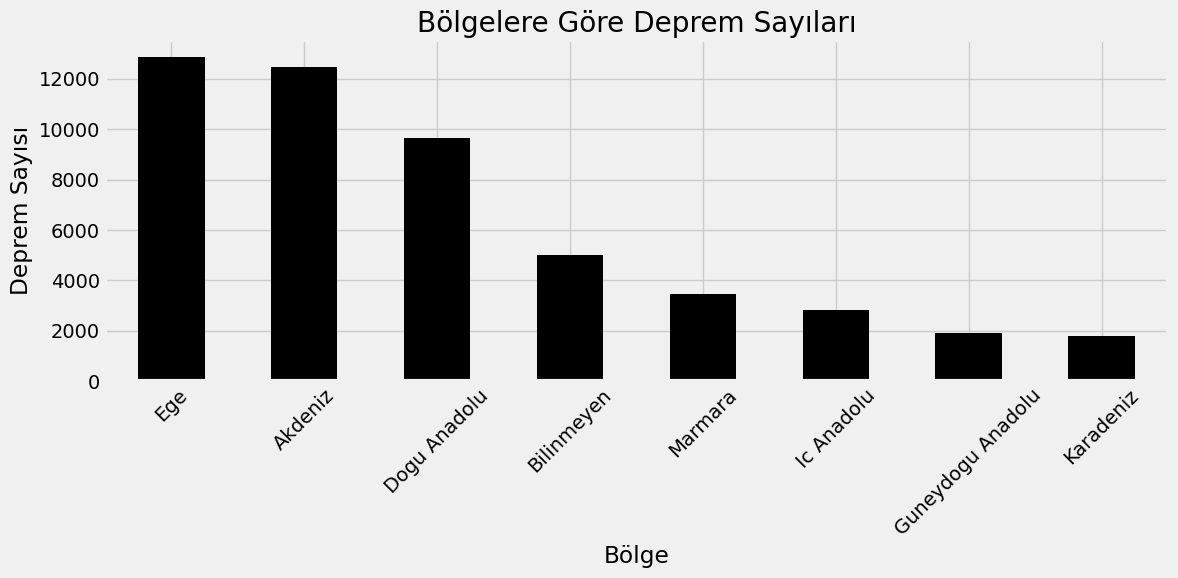

In [311]:
deprem_sayilari = data_bolge['Bolge'].value_counts()


deprem_sayilari = deprem_sayilari.sort_values(ascending=False)


plt.figure(figsize=(12, 6))
deprem_sayilari.plot(kind='bar', color='black')
plt.title('Bölgelere Göre Deprem Sayıları')
plt.xlabel('Bölge')
plt.ylabel('Deprem Sayısı')
plt.xticks(rotation=45)  


plt.tight_layout()
plt.show()


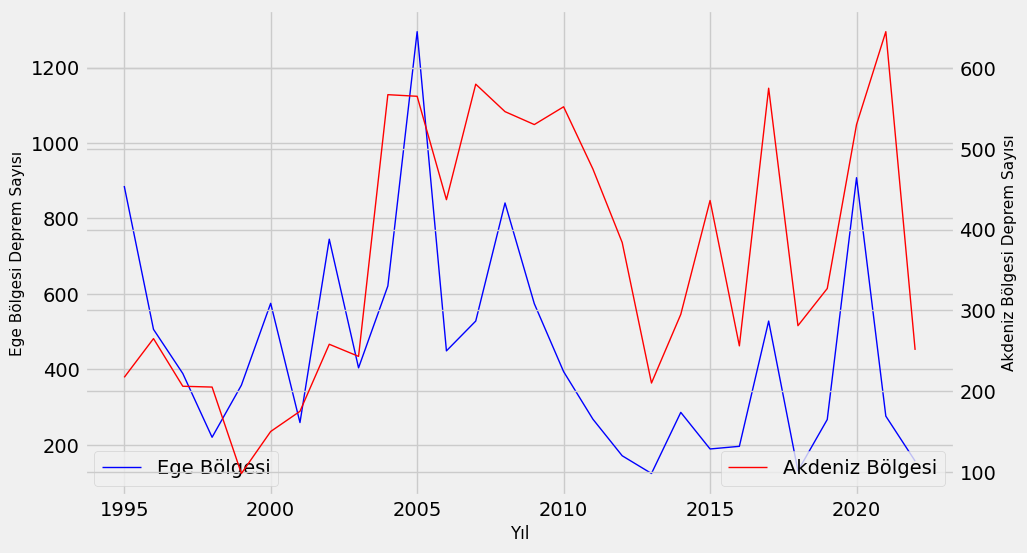

In [337]:
fig, ax = plt.subplots(figsize=(10, 6))
ax2 = ax.twinx()

# Ege bölgesinin 1995-2023 yılları arasındaki deprem sayıları
ege_depremleri = gdf.query("Bolge == 'Ege' and index >= '1995-01-01' and index < '2023-01-01'")
ege_depremleri.groupby(ege_depremleri.index.year)['Bolge'].count().plot(ax=ax, label="Ege Bölgesi", color='b', linewidth=1)

# Akdeniz bölgesinin 1995-2023 yılları arasındaki deprem sayıları
akdeniz_depremleri = gdf.query("Bolge == 'Akdeniz' and index >= '1995-01-01' and index < '2023-01-01'")
akdeniz_depremleri.groupby(akdeniz_depremleri.index.year)['Bolge'].count().plot(ax=ax2, label="Akdeniz Bölgesi", color='r', linewidth=1)

ax.set_xlabel("Yıl", fontsize=12, fontweight='light')
ax.set_ylabel("Ege Bölgesi Deprem Sayısı", fontsize=11, fontweight='light', color='black')
ax2.set_ylabel("Akdeniz Bölgesi Deprem Sayısı", fontsize=11, fontweight='light', color='black')

ax.legend(loc="lower left")
ax2.legend(loc="lower right")

plt.show()



In [313]:
#( xM değeri 3.1'den büyük olanları alalım)
filtered_data = gdf[gdf['xM'] >= 3.4]


fig = px.scatter_geo(
    filtered_data,
    lat=filtered_data.geometry.x,  # enlem değerleri
    lon=filtered_data.geometry.y,  # boylam değerleri
    color='xM',
    scope='asia',  # asia world europe 
    color_continuous_scale='Reds',
    hover_name='Yer',
    fitbounds='locations',
    basemap_visible=True,
    opacity=0.5
)


fig.update_layout(autosize=True)


fig.show()


# DATA MODELLİNG

"Bu çalışma, Keras Deep Learning çerçevesini kullanarak geçmiş deprem verilerine dayanarak deprem büyüklüğünü (xM) tahmin etmek amacıyla bir model geliştirmeyi amaçlamaktadır. Geliştirilecek olan model, özellikle depremin büyüklüğünü çeşitli girdi özellikleri kullanarak tahmin etmeyi hedeflemektedir. Bu model, geçmiş deprem olaylarına dayalı olarak, belirli koordinatlar, yer türü, ve diğer ilgili özellikler gibi faktörleri göz önünde bulundurarak, gelecekteki deprem olaylarının büyüklüğünü öngörmek için kullanılacaktır."

In [314]:
data_bolge.head()

,No,Der(km),xM,MD,ML,Mw,Ms,Mb,Tip,Yer,Koordinatlar,geometry,Bolge
2023-07-31,1,4.000,3.500,0.000,3.500,3.400,0.000,0.000,Ke,KAHRAMANMARAS,"37.4153, 37.1703",POINT (37.41530 37.17030),Akdeniz
2023-07-31,2,5.200,3.500,0.000,3.500,3.400,0.000,0.000,Ke,ADIYAMAN,"38.1413, 38.434",POINT (38.14130 38.43400),Guneydogu Anadolu
2023-07-31,3,6.200,3.000,0.000,3.000,0.000,0.000,0.000,Ke,EGE DENIZI,"37.8352, 26.8353",POINT (37.83520 26.83530),Ege
2023-07-30,4,5.300,3.100,0.000,3.100,3.100,0.000,0.000,Ke,DUZCE,"40.8085, 31.0183",POINT (40.80850 31.01830),Karadeniz
2023-07-30,5,2.400,3.000,0.000,3.000,0.000,0.000,0.000,Ke,ADIYAMAN,"38.129, 38.1863",POINT (38.12900 38.18630),Guneydogu Anadolu
2023-07-30,6,4.400,3.700,0.000,3.600,3.700,0.000,0.000,Ke,HATAY,"36.2735, 35.8717",POINT (36.27350 35.87170),Akdeniz
2023-07-30,7,2.100,3.000,0.000,3.000,2.900,0.000,0.000,Ke,SAKARYA,"40.5722, 30.7302",POINT (40.57220 30.73020),Marmara
2023-07-29,8,5.200,3.000,0.000,3.000,3.000,0.000,0.000,Ke,KAHRAMANMARAS,"37.9832, 36.2683",POINT (37.98320 36.26830),Akdeniz
2023-07-29,9,5.600,3.000,0.000,3.000,2.900,0.000,0.000,Ke,NIGDE,"37.6385, 34.7417",POINT (37.63850 34.74170),Ic Anadolu
2023-07-29,10,5.000,3.000,0.000,3.000,0.000,0.000,0.000,Ke,ADANA,"37.5888, 35.917",POINT (37.58880 35.91700),Akdeniz


In [315]:
# Bu kod ile amacımız verimizi keras modeline uygun hale getirmek, tarihleri; hedef tarih xm değeri ve ondan -1,-2,-3 gün önceki olan sırayla xm değerini alıyoruz.
def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3): 
    # İlk ve son tarihleri datetime nesnelerine dönüştürün
    first_date = pd.to_datetime(first_date_str)
    last_date = pd.to_datetime(last_date_str)

    # Hedef tarihi ilk tarih olarak ayarladık 
    target_date = first_date
    
    
    dates = []
    X, Y = [], []

    while True:
        # Hedef tarihten önceki n+1 günü içeren bir alt küme seçin
        df_subset = dataframe.loc[:target_date].tail(n+1)
        
        # Alt kümenin uzunluğu n+1 değilse, bir hata mesajı versin ve işlem sonlasın
        if len(df_subset) != n+1:
            print(f'Hata: {n} boyutunda pencere, {target_date} tarihi için çok büyük.')
            return

        # Alt kümenin 'xM' sütunundaki değerleri aldık
        values = df_subset['xM'].to_numpy()
        # x: ilk n değerler, y: son değer
        x, y = values[:-1], values[-1]

        
        dates.append(target_date)
        X.append(x)
        Y.append(y)

        
        next_date = target_date + datetime.timedelta(days=7)
        
        
        if next_date > last_date:
            break
        
        target_date = next_date

    # Sonuçları içerecek bir DataFrame oluşturun
    ret_df = pd.DataFrame({})
    ret_df['Hedef Tarih'] = dates
    
    # X verilerini bir numpy dizisine dönüştürün ve sırayla eklemek için döngü kullanın
    X = np.array(X)
    for i in range(0, n):
        ret_df[f'Hedef-{n-i}'] = X[:, i]
    
    
    ret_df['Hedef'] = Y

    return ret_df






In [316]:
windowed_df = df_to_windowed_df(gdf, 
                                '1994-01-01',  # Başlangıç tarihi
                                '2023-07-31',  # Bitiş tarihi
                                n=3)  # Pencere boyutu

print(windowed_df)


     Hedef Tarih  Hedef-3  Hedef-2  Hedef-1  Hedef
0     1994-01-01    3.200    3.000    3.500  3.100
1     1994-01-08    3.200    3.000    3.500  3.100
2     1994-01-15    3.200    3.000    3.500  3.100
3     1994-01-22    3.200    3.000    3.500  3.100
4     1994-01-29    3.200    3.000    3.500  3.100
5     1994-02-05    3.200    3.000    3.500  3.100
6     1994-02-12    3.200    3.000    3.500  3.100
7     1994-02-19    3.200    3.000    3.500  3.100
8     1994-02-26    3.200    3.000    3.500  3.100
9     1994-03-05    3.200    3.000    3.500  3.100
10    1994-03-12    3.200    3.000    3.500  3.100
11    1994-03-19    3.200    3.000    3.500  3.100
12    1994-03-26    3.200    3.000    3.500  3.100
13    1994-04-02    3.200    3.000    3.500  3.100
14    1994-04-09    3.200    3.000    3.500  3.100
15    1994-04-16    3.200    3.000    3.500  3.100
16    1994-04-23    3.200    3.000    3.500  3.100
17    1994-04-30    3.200    3.000    3.500  3.100
18    1994-05-07    3.200    3.

In [317]:
# modelin input değerini üç tensörlü hale getiriyoruz. 
def windowed_df_to_date_X_y(windowed_dataframe):
    df_as_np = windowed_dataframe.to_numpy()
    
    dates = df_as_np[:, 0].astype('str') # hedef tarihi
    
    middle_matrix = df_as_np[:, 1:-1]
  
    X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1)) # hedef -3 -2 -1 

    Y = df_as_np[:,-1] # hedef 

    return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape 

((1544,), (1544, 3, 1), (1544,))

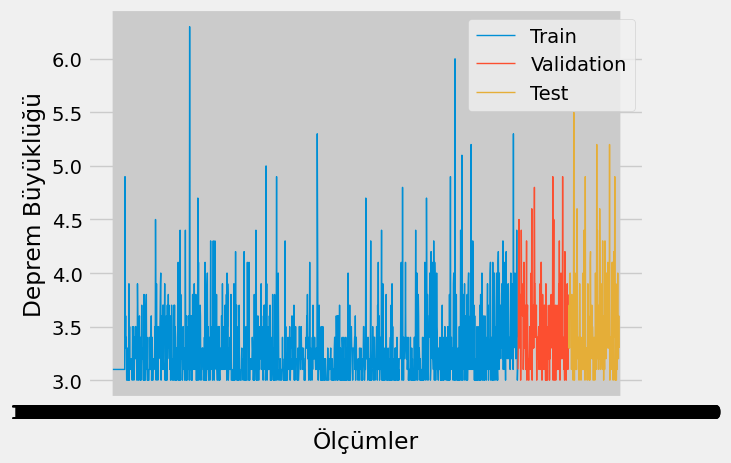

In [318]:
q_80 = int(len(dates) * .8) # train test validation ayrımı 
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train,lw=1)
plt.plot(dates_val, y_val,lw=1)
plt.plot(dates_test, y_test,lw=1)

plt.ylabel('Deprem Büyüklüğü')
plt.xlabel('Ölçümler')

plt.legend(['Train', 'Validation', 'Test'])

In [319]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import set_random_seed
from tensorflow.keras.optimizers.legacy import Adam  

model_keras = Sequential()
model_keras.add(Dense(128, input_shape=((3,1)), activation="relu"))
model_keras.add(Dense(64, activation="relu"))
model_keras.add(Dense(32, activation="relu"))
model_keras.add(Dense(16, activation="relu"))
model_keras.add(Dense(8, activation="relu"))
model_keras.add(Dense(1))



model_keras.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])
print(model_keras.summary())

set_random_seed(1)


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_55 (Dense)            (None, 3, 128)            256       
                                                                 
 dense_56 (Dense)            (None, 3, 64)             8256      
                                                                 
 dense_57 (Dense)            (None, 3, 32)             2080      
                                                                 
 dense_58 (Dense)            (None, 3, 16)             528       
                                                                 
 dense_59 (Dense)            (None, 3, 8)              136       
                                                                 
 dense_60 (Dense)            (None, 3, 1)              9         
                                                                 
Total params: 11265 (44.00 KB)
Trainable params: 1126

In [320]:
model_keras.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30,verbose=0)
print(model_keras.evaluate(X_test, y_test)) # Xm 0.37 sapma. 

5/5 [==============================] - 0s 1ms/step - loss: 0.2965 - mean_absolute_error: 0.3768
[0.2964564561843872, 0.3767647445201874]


5/5 [==============================] - 0s 2ms/step


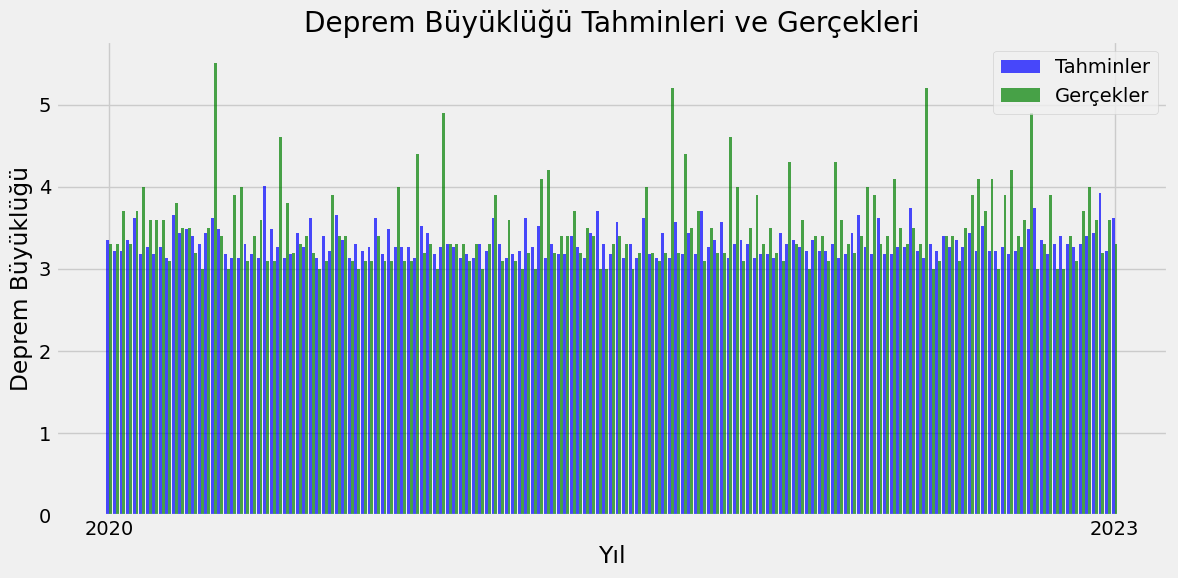

In [335]:
# Tahminlerin ve gerçeklerin boyutları uyumlu hale getirdik.
tahminler = model_keras.predict(X_test).flatten()  # Modelin tahminleri
gercekler = y_test.flatten()  # Gerçek deprem büyüklükleri, tahminlerle aynı boyuta getirildi

tahminler = tahminler[:len(gercekler)]

tarihler = dates_test[:len(gercekler)]

# Tarihleri yıl olarak dönüştürün
yil_tarihler = [pd.Timestamp(tarih).year for tarih in pd.to_datetime(tarihler)]

# Bar genişliği ayarları
bar_genislik = 0.45
indeksler = np.arange(len(yil_tarihler))


plt.figure(figsize=(12, 6))
plt.bar(indeksler - bar_genislik/2, tahminler[:len(tarihler)], label='Tahminler', width=bar_genislik, color='blue', alpha=0.7)
plt.bar(indeksler + bar_genislik/2, gercekler[:len(tarihler)], label='Gerçekler', width=bar_genislik, color='green', alpha=0.7)

plt.xlabel('Yıl')
plt.ylabel('Deprem Büyüklüğü')
plt.title('Deprem Büyüklüğü Tahminleri ve Gerçekleri')
plt.legend()
plt.grid(True)

plt.xticks([indeksler[0], indeksler[-1]], [yil_tarihler[0], yil_tarihler[-1]])

plt.tight_layout()
plt.show()


##### The end 
##### "Bu modelin geliştirilmesi devam edecektir."